# Практическая работа №1

## Вариант 3

## Работа с типами данных. Повторение базового уровня Python

**Цель работы**

Провести анализ показателей населения, географических и временных характеристик городов в составе федеративного государства, используя инструменты Python для обработки данных, расчётов и выявления закономерностей. Исследовать роль неизменяемости данных в обеспечении целостности анализа.

**Задание**

1. Выберите страну с федеративным устройством, включающую не менее трёх республик или автономных субъектов (например, Индия, Нигерия, Малайзия). Добавьте (картинку) карту с выбранными данными. Почему именно они вызвали интерес к анализу?

2. Для каждого из трёх субъектов выберите минимум по 5 городов, включая его столицу.

3. Самостоятельно соберите данные для каждого города:

    Данные должны включать:
    - Полное название города.
    - Республика (субъект), к которой относится.
    - Географические координаты (широта, долгота) — Создайте две версии набора данных: с высокой точностью: координаты с 6 знаками и с низкой точностью: те же координаты, округлённые до 2 знаков.
    - Часовой пояс.
    - При одном часовом поясе в одном субъекте: моменты времени захода и восхода солнца (на анализируемый период времени).
    - Указание, является ли город столицей республики (булева переменная).

**Выбор страны, регионов, городов и составление датасета**

В качестве страны с федеративным устройством были выбраны США.

Для анализа были выбраны следующие три штата и по пять городов (включая столицу) в каждом из них:

<img src="./img/selected_states_map.png" alt="Выбранные штаты США" width="700" height="auto">

1. **Калифорния:**
    1. Сакраменто (столица штата)
    2. Лос-Анджелес
    3. Сан-Франциско
    4. Фресно
    5. Реддинг
2. **Техас:**
    1. Остин (столица штата)
    2. Хьюстон
    3. Даллас
    4. Эль-Пасо
    5. Амарилло
3. **Аризона:**
    1. Финикс (столица штата)
    2. Тусон
    3. Флагстафф
    4. Юма
    5. Меса

В Интернете были найдены требующиеся данные по выбранным городам (на дату 13.09.2025):

| Название города | Штат | Широта | Долгота | Часовой пояс (относительно UTC) | Время восхода Солнца | Время захода Солнца | Столица штата? |
|-----|-----|-----|-----|-----|-----|-----|-----|
| Сакраменто | Калифорния | 38.581667 | -121.494444 | -7 | 06:46 | 19:16 | Да  |
| Лос-Анджелес | Калифорния | 34.052234 | -118.243685 | -7 | 06:35 | 19:01 | Нет |
| Сан-Франциско | Калифорния | 37.783333 | -122.416667 | -7 | 06:50 | 19:19 | Нет |
| Фресно | Калифорния | 36.737798 | -119.787125 | -7 | 06:40 | 19:08 | Нет |
| Реддинг | Калифорния | 40.586389 | -122.391667 | -7 | 06:48 | 19:21 | Нет |
| Остин | Техас | 30.267222 | -97.743056 | -5 | 07:14 | 19:38 | Да |
| Хьюстон | Техас | 29.762778 | -95.383056 | -5 | 07:05 | 19:28 | Нет |
| Даллас | Техас | 32.779167 | -96.808889 | -5 | 07:09 | 19:35 | Нет |
| Эль-Пасо | Техас | 31.759167 | -106.488611 | -6 | 06:49 | 19:13 | Нет |
| Амарилло | Техас | 35.199167 | -101.845278 | -5 | 07:28 | 19:56 | Нет |
| Финикс | Аризона | 33.448333 | -112.073889 | -7 | 06:10 | 18:36 | Да |
| Тусон | Аризона | 32.221667 | -110.926389 | -7 | 06:06 | 18:31 | Нет |
| Флагстафф | Аризона | 35.198284 | -111.651299 | -7 | 06:08 | 18:35 | Нет |
| Юма | Аризона | 32.666667 | -114.572222 | -7 | 06:21 | 18:46 | Нет |
| Меса | Аризона | 33.422222 | -111.822778 | -7 | 06:09 | 18:35 | Нет |

### Реализация на Python

**1. Организация данных**

- Реализуйте хранение информации о каждом городе с учётом категории данных.
- Обеспечьте целостность и защиту от случайных изменений неизменяемых важных параметров.
- Используйте разные структуры данных в зависимости от логики использования.
- Проведите анализ занимаемой памяти для двух наборов данных с различными точностями.
- Какой выигрыш в памяти? Почему получен данный результат?

In [26]:
# Установка библиотек
# %pip install pandas
# %pip install matplotlib
# %pip install scipy

In [27]:
# Импорты
import sys
from typing import NamedTuple
from datetime import date, time
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Создаём неизменяемую структуру для хранения данных о городе
class CityData(NamedTuple):
    name: str
    state: str
    latitude: float
    longitude: float
    timezone: int
    sunrise: time
    sunset: time
    is_capital: bool
    collected_date: date

In [5]:
# Собираем все города в один список
cities_data = [
    # Калифорния
    CityData("Сакраменто", "Калифорния", 38.581667, -121.494444, -7, time(6, 46), time(19, 16), True, date(2025, 9, 13)),
    CityData("Лос-Анджелес", "Калифорния", 34.052234, -118.243685, -7, time(6, 35), time(19, 1), False, date(2025, 9, 13)),
    CityData("Сан-Франциско", "Калифорния", 37.783333, -122.416667, -7, time(6, 50), time(19, 19), False, date(2025, 9, 13)),
    CityData("Фресно", "Калифорния", 36.737798, -119.787125, -7, time(6, 40), time(19, 8), False, date(2025, 9, 13)),
    CityData("Реддинг", "Калифорния", 40.586389, -122.391667, -7, time(6, 48), time(19, 21), False, date(2025, 9, 13)),
    
    # Техас
    CityData("Остин", "Техас", 30.267222, -97.743056, -5, time(7, 14), time(19, 38), True, date(2025, 9, 13)),
    CityData("Хьюстон", "Техас", 29.762778, -95.383056, -5, time(7, 5), time(19, 28), False, date(2025, 9, 13)),
    CityData("Даллас", "Техас", 32.779167, -96.808889, -5, time(7, 9), time(19, 35), False, date(2025, 9, 13)),
    CityData("Эль-Пасо", "Техас", 31.759167, -106.488611, -6, time(6, 49), time(19, 13), False, date(2025, 9, 13)),
    CityData("Амарилло", "Техас", 35.199167, -101.845278, -5, time(7, 28), time(19, 56), False, date(2025, 9, 13)),
    
    # Аризона
    CityData("Финикс", "Аризона", 33.448333, -112.073889, -7, time(6, 10), time(18, 36), True, date(2025, 9, 13)),
    CityData("Тусон", "Аризона", 32.221667, -110.926389, -7, time(6, 6), time(18, 31), False, date(2025, 9, 13)),
    CityData("Флагстафф", "Аризона", 35.198284, -111.651299, -7, time(6, 8), time(18, 35), False, date(2025, 9, 13)),
    CityData("Юма", "Аризона", 32.666667, -114.572222, -7, time(6, 21), time(18, 46), False, date(2025, 9, 13)),
    CityData("Меса", "Аризона", 33.422222, -111.822778, -7, time(6, 9), time(18, 35), False, date(2025, 9, 13))
]

In [6]:
# При необходимости данные можно легко преобразовать в pandas DataFrame
df = pd.DataFrame(cities_data)
df.head()

,name,state,latitude,longitude,timezone,sunrise,sunset,is_capital,collected_date
0,Сакраменто,Калифорния,38.581667,-121.494444,-7,06:46:00,19:16:00,True,2025-09-13
1,Лос-Анджелес,Калифорния,34.052234,-118.243685,-7,06:35:00,19:01:00,False,2025-09-13
2,Сан-Франциско,Калифорния,37.783333,-122.416667,-7,06:50:00,19:19:00,False,2025-09-13
3,Фресно,Калифорния,36.737798,-119.787125,-7,06:40:00,19:08:00,False,2025-09-13
4,Реддинг,Калифорния,40.586389,-122.391667,-7,06:48:00,19:21:00,False,2025-09-13


Сравним объёмы памяти, которые занимают наборы данных со значением координат высокой точности (6 знаков) и низкой точности (2 знака).

In [7]:
# Набор с данными по городам с низкой точностью координат
cities_data_low_precision = []
for city in cities_data:
    cities_data_low_precision.append(
        CityData(
            city.name,
            city.state,
            round(city.latitude, 2),
            round(city.longitude, 2),
            city.timezone,
            city.sunrise,
            city.sunset,
            city.is_capital,
            city.collected_date
        )
    )

df_low_precision = pd.DataFrame(cities_data_low_precision)
df_low_precision.head()

,name,state,latitude,longitude,timezone,sunrise,sunset,is_capital,collected_date
0,Сакраменто,Калифорния,38.58,-121.49,-7,06:46:00,19:16:00,True,2025-09-13
1,Лос-Анджелес,Калифорния,34.05,-118.24,-7,06:35:00,19:01:00,False,2025-09-13
2,Сан-Франциско,Калифорния,37.78,-122.42,-7,06:50:00,19:19:00,False,2025-09-13
3,Фресно,Калифорния,36.74,-119.79,-7,06:40:00,19:08:00,False,2025-09-13
4,Реддинг,Калифорния,40.59,-122.39,-7,06:48:00,19:21:00,False,2025-09-13


In [8]:
# Создаём DataFrame с высокой и низкой точностью координат
df_high_precision = pd.DataFrame(cities_data)
df_low_precision = pd.DataFrame(cities_data_low_precision)

# Сравним два датасета по размеру занимаемой ими памяти
print("=== АНАЛИЗ ЗАНИМАЕМОЙ ПАМЯТИ ===")
print(f"Высокая точность (6 знаков): {df_high_precision.memory_usage(deep=True).sum()} байт")
print(f"Низкая точность (2 знака):   {df_low_precision.memory_usage(deep=True).sum()} байт")

high_memory = df_high_precision.memory_usage(deep=True).sum()
low_memory = df_low_precision.memory_usage(deep=True).sum()
memory_saving = high_memory - low_memory
memory_saving_percent = (memory_saving / high_memory) * 100

print(f"\n=== РЕЗУЛЬТАТЫ ===")
print(f"Экономия памяти: {memory_saving} байт ({memory_saving_percent:.2f}%)")

=== АНАЛИЗ ЗАНИМАЕМОЙ ПАМЯТИ ===
Высокая точность (6 знаков): 5441 байт
Низкая точность (2 знака):   5441 байт

=== РЕЗУЛЬТАТЫ ===
Экономия памяти: 0 байт (0.00%)


Видим, что два набора с разной точностью координат занимают одинаковый объём памяти.

Это вызвано тем, что тип данных `float` занимает одинаковый объём памяти вне зависимости от хранимого в нём значения:

In [9]:
a = 1.12
b = 1.123456

print(f"{a} == {sys.getsizeof(a)} байт")
print(f"{b} == {sys.getsizeof(b)} байт")

1.12 == 24 байт
1.123456 == 24 байт


Из этого можно сделать вывод, что оптимальнее по-умолчанию использовать в наборе данных значения координат более высокой точности, так как это соответственно увеличивает точность данных, но при этом никак не влияет на величину используемой памяти.

**2. Анализ плотности населения и расстояний**

- Рассчитайте расстояние по прямой (в км) от столицы страны до каждого из выбранных городов.
- Рассчитайте расстояние от столицы республики до каждого другого города в её составе.
- Определите:
    - Город, наиболее удалённый от столицы страны.
    - Город, наиболее удалённый от столицы своей республики.

> Для расчёта расстояний используйте формулу гаверсинуса. Координаты должны быть в радианах. Как оптимально реализовать перевод в радианы? В каких единицах измерения целесообразно хранить координаты?

Проведите измерения для обоих наборов данных. Какова потеря в точности расстояния? Целесообразна ли для данной задачи высокая точность? Сравнения данных производить в %.

In [10]:
# Создадим функцию для нахождения расстояния между двумя точками (городами) по их координатам
def haversine_distance(coord1, coord2):
    # Радиус Земли в километрах
    R = 6371

    # Преобразуем градусы в радианы
    lat1 = math.radians(coord1[0])
    lon1 = math.radians(coord1[1])
    lat2 = math.radians(coord2[0])
    lon2 = math.radians(coord2[1])

    # Находим разницу координат
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Применяем формулу гаверсинуса
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))

    # Находим и возвращаем расстояние
    distance = R * c
    return distance

In [11]:
# Координаты Вашингтона (столица США)
WASHINGTON_COORD = (38.904722, -77.016389)

distances_to_washington = {}
distances_to_washington_low_precision = {}

# Находим расстояние городов от Вашингтона
# (при разной точности координат)
for city in cities_data:
    distances_to_washington[city.name] = haversine_distance((city.latitude, city.longitude), 
                                                            WASHINGTON_COORD)
for city in cities_data_low_precision:
    distances_to_washington_low_precision[city.name] = haversine_distance((city.latitude, city.longitude),
                                                                          WASHINGTON_COORD)

# Выводим расстояния в порядке убывания и рассчитываем погрешность
print("=== РАССТОЯНИЯ ДО ВАШИНГТОНА ===")
print("=== (сортировка по убыванию) ===")
print("================================")
for c, d in sorted(distances_to_washington.items(), key=lambda item: item[1], reverse=True):
    d_low = distances_to_washington_low_precision[c]
    diff = d_low - d
    percent = (diff / d) * 100
    print(f"{c} (высокая точность): {d:.2f} км")
    print(f"{c} (низкая точность): {d_low:.2f} км")
    print(f"Погрешность при низкой точности: {diff:.2f} км ({percent:.2f}%)")
    print("-----")

=== РАССТОЯНИЯ ДО ВАШИНГТОНА ===
=== (сортировка по убыванию) ===
Сан-Франциско (высокая точность): 3919.84 км
Сан-Франциско (низкая точность): 3920.23 км
Погрешность при низкой точности: 0.38 км (0.01%)
-----
Реддинг (высокая точность): 3840.68 км
Реддинг (низкая точность): 3840.46 км
Погрешность при низкой точности: -0.22 км (-0.01%)
-----
Сакраменто (высокая точность): 3818.38 км
Сакраменто (низкая точность): 3818.05 км
Погрешность при низкой точности: -0.33 км (-0.01%)
-----
Фресно (высокая точность): 3730.08 км
Фресно (низкая точность): 3730.26 км
Погрешность при низкой точности: 0.17 км (0.00%)
-----
Лос-Анджелес (высокая точность): 3693.79 км
Лос-Анджелес (низкая точность): 3693.56 км
Погрешность при низкой точности: -0.23 км (-0.01%)
-----
Юма (высокая точность): 3432.81 км
Юма (низкая точность): 3432.48 км
Погрешность при низкой точности: -0.33 км (-0.01%)
-----
Финикс (высокая точность): 3184.36 км
Финикс (низкая точность): 3183.95 км
Погрешность при низкой точности: -0.40 км

In [12]:
distances_to_state_capital = {}
distances_to_state_capital_low_precision = {}

state_capitals_coord = {}
for city in cities_data:
    if city.is_capital:
        state_capitals_coord[city.state] = (city.latitude, city.longitude)

for city in cities_data:
    if city.is_capital:
        continue
    city_coord = (city.latitude, city.longitude)
    state_capital_coord = state_capitals_coord[city.state]
    distances_to_state_capital[city.name] = haversine_distance(city_coord, state_capital_coord)
for city in cities_data_low_precision:
    if city.is_capital:
        continue
    city_coord = (city.latitude, city.longitude)
    state_capital_coord = state_capitals_coord[city.state]
    distances_to_state_capital_low_precision[city.name] = haversine_distance(city_coord, state_capital_coord)

print("=== РАССТОЯНИЯ ДО СТОЛИЦЫ СВОЕГО ШТАТА ===")
print("===      (сортировка по убыванию)      ===")
print("==========================================")
for c, d in sorted(distances_to_state_capital.items(), key=lambda item: item[1], reverse=True):
    d_low = distances_to_state_capital_low_precision[c]
    diff = d_low - d
    percent = (diff / d) * 100
    print(f"{c} (высокая точность): {d:.2f} км")
    print(f"{c} (низкая точность): {d_low:.2f} км")
    print(f"Погрешность при низкой точности: {diff:.2f} км ({percent:.2f}%)")
    print("-----")

=== РАССТОЯНИЯ ДО СТОЛИЦЫ СВОЕГО ШТАТА ===
===      (сортировка по убыванию)      ===
Эль-Пасо (высокая точность): 849.54 км
Эль-Пасо (низкая точность): 849.68 км
Погрешность при низкой точности: 0.14 км (0.02%)
-----
Амарилло (высокая точность): 669.15 км
Амарилло (низкая точность): 669.48 км
Погрешность при низкой точности: 0.33 км (0.05%)
-----
Лос-Анджелес (высокая точность): 581.69 км
Лос-Анджелес (низкая точность): 582.08 км
Погрешность при низкой точности: 0.38 км (0.07%)
-----
Даллас (высокая точность): 293.01 км
Даллас (низкая точность): 293.07 км
Погрешность при низкой точности: 0.06 км (0.02%)
-----
Фресно (высокая точность): 254.20 км
Фресно (низкая точность): 253.85 км
Погрешность при низкой точности: -0.35 км (-0.14%)
-----
Юма (высокая точность): 248.52 км
Юма (низкая точность): 248.19 км
Погрешность при низкой точности: -0.33 км (-0.13%)
-----
Реддинг (высокая точность): 235.80 км
Реддинг (низкая точность): 236.13 км
Погрешность при низкой точности: 0.33 км (0.14%)
----

На основе полученных данных можно сделать вывод, что при использовании формулы гаверсинуса для больших расстояний погрешность практически не существенна (менее 1% в подавляющем большинстве случаев), а значит для подобных расчётов не сильно принципиально, используется ли высокая (6 знаков) или низка (2 знака) точность координат. Тем не менее, при расчёте более маленьких расстояний (например, от Месы до Финикса с расстоянием между ними в 23 км), погрешность чуть превысила 1%, что в некоторых случаях может быть существенно. Так что лучше всё-таки использовать координаты с более высокой точностью, особенно учитывая, что ранее было доказано, что они занимают такой же объём памяти, как и координаты с более низкой точностью.

**3. Анализ часовых поясов**

- Определите, все ли города одного субъекта находятся в одном часовом поясе.
- Выявите случаи, когда города разных субъектов имеют одинаковое время, если подобный факт свершился для вышей выборки.
- Проанализируйте, существует ли корреляция между долготой города и его часовым поясом.
- Сделайте вывод: можно ли однозначно определить часовой пояс по координатам?
- Проанализируйте при совпадении часовых поясов в одном субъекте данные по заходу и
восходу солнца.

In [ ]:
# Выводим принадлежность городов часовым поясам в разбивке по штатам
states = list({city.state for city in cities_data})
print("=== ВРЕМЕННЫЕ ПОЯСА ГОРОДОВ ПО ШТАТАМ ===")
for state in states:
    timezones = {}
    for city in cities_data:
        if city.state == state:
            if city.timezone in timezones:
                timezones[city.timezone].append(city.name)
            else:
                timezones[city.timezone] = [city.name]
    print()
    print(f"{state}:")
    for t in timezones:
        print(f"{t}: {timezones[t]}")

=== ВРЕМЕННЫЕ ПОЯСА ГОРОДОВ ПО ШТАТАМ ===

Аризона:
-7: ['Финикс', 'Тусон', 'Флагстафф', 'Юма', 'Меса']

Техас:
-5: ['Остин', 'Хьюстон', 'Даллас', 'Амарилло']
-6: ['Эль-Пасо']

Калифорния:
-7: ['Сакраменто', 'Лос-Анджелес', 'Сан-Франциско', 'Фресно', 'Реддинг']


Как видим, в выборку попали как субъекты, все города которых имеют один и тот же часовой пояс (Аризона и Калифорния), так и субъекты, города которых имеют разные часовые пояса (Техас).

Также заметим, что города субъектов Аризона и Калифорния имеют одинаковый часовой пояс, хотя и находятся в разных субъектах.

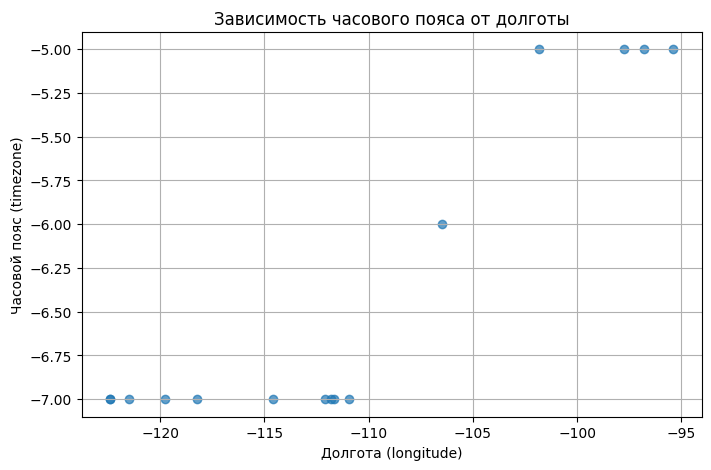

In [ ]:
df = pd.DataFrame(cities_data)

# Построим график зависимости часового пояса от долготы
plt.figure(figsize=(8, 5))
plt.scatter(df['longitude'], df['timezone'], alpha=0.7)
plt.xlabel('Долгота (longitude)')
plt.ylabel('Часовой пояс (timezone)')
plt.title('Зависимость часового пояса от долготы')
plt.grid(True)
plt.show()

In [30]:
# Рассчитаем коэффициент корреляции Пирсона и его значимость (P-value)
print("=== КОРРЕЛЯЦИЯ ===")
pearson_corr, p_value = stats.pearsonr(df['longitude'], df['timezone'])
print(f"Коэффициент корреляции Пирсона: {pearson_corr:.2f}")
print(f"P-value: {p_value:.2f}")

=== КОРРЕЛЯЦИЯ ===
Коэффициент корреляции Пирсона: 0.90
P-value: 0.00


На основе полученных данных можно сделать вывод, что между долготой и часовым поясом городов из выборки существует сильная корреляция (Коэффициент корреляции Пирсона = 0.9) и эта корреляция статистически значима (P-value = 0 < 0.05). Подобный вывод совпадает с фактической информацией о США, где часовые пояса городов действительно привязаны к их долготе, а значит зная долготу американского города, можно с достаточно высокой точностью предсказать его часовой пояс, хотя точность всё-равно будет не абсолютной, так как часовой пояс города может частично зависеть и от других факторов.